# PD Model

### [Go Back to Overview]('https://workspace.datacamp.com/workspace/ec328d36-98ae-4a63-914f-1e72533ed18c')


PD model stands for Probability of Default model, which is used to predoict the likelihood of credit default possibility regarding consumer loans.

Usually, analysts use two methods to build classification model:
1. **Logistic regression**
2. **Decision tree (Gradient Boosted trees)**

( Other machine learning models are either in "blackbox" that could be risky to ultalize or too complex to interpret to other teams )



## Logistic Regression Modeling

You've now cleaned up the data and created the new data set cr_loan_clean.

<img src="https://bradleyboehmke.github.io/HOML/05-logistic-regression_files/figure-html/whylogit-1.png" alt="drawing" width="700" height="600"/>

In [72]:
cr_loan_clean = pd.read_csv('https://assets.datacamp.com/production/repositories/4876/datasets/33e400c8f73329d290c6c25eef33de458b4db1bf/cr_loan_nout_nmiss.csv')
# Have a brief look at the top 5 rows of all columns in this dataset
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


### a. Creating training and test sets

Data should be separated into training and test sets. `test_train_split()` is used to create both at the same time. The training set is used to tmake predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

Here, we use **70%** data to **train** models and **30%** data to **test** our models.

In [88]:
# Import the library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Create the X and y data sets
x = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=123)

### b. Fit Regression

In **Multivariate Logistic Regression model**, we could use multiple variables to help us predict probability of default.
#### 1. Numeric variables

In [123]:
# Import the library
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(x_train, np.ravel(y_train))

# Print the models coefficients
print("Coefficient of Interets Rate is:" + ' ' + str(clf_logistic.coef_[0,0]) + '\n' +
"Coefficient of Employment Length is:" + ' ' + str(clf_logistic.coef_[0,1]) + '\n' +
"Coefficient of Income is:" + ' ' + str(clf_logistic.coef_[0,2]))

Coefficient of Interets Rate is: 4.554901038026335e-10
Coefficient of Employment Length is: -2.0859281011137936e-09
Coefficient of Income is: -2.15914281714422e-05


#### 2. Non-numeric variables
We could fit numeric data into logistic regression directly. However, in python marchine learning doesn't know how to  input non-numeric data into regression. Therefore, we have to create dummy variables to convert all characters into numbers.

#### Solution: One-hot encoding
The main idea of One-hot encoding is to represent a string with a numeric value. The methodology is like the picture below:

<img src="https://miro.medium.com/max/3758/1*O_pTwOZZLYZabRjw3Ga21A.png" alt="drawing" width="600" height="400"/>


In [133]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num,cred_str_onehot], axis=1)

# Check the new columns in the new data set (optional)
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


We can see, for instance, `Loan_grade` column was seperated into several columns(`loan_grade_A`, `loan_grade_B`, `loan_grade_C`, etc) with either "0" or "1" values.

### c.  Prediction

All of the data processing is complete and it's time to begin creating predictions for probability of default with `predict_proba` model produces.

In [140]:
# Create the X and y data sets with modified data
X = cr_loan_prep.loc[:, cr_loan_prep.columns != 'loan_status']
Y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=123)


In [150]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(Y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
true_df = Y_test.head()

# Concatenate and print the two data frames for comparison
pd.concat([true_df.reset_index(drop = True), preds_df[0:5]], axis = 1)

,loan_status,prob_default
0,1,0.447322
1,1,0.224922
2,0,0.290339
3,0,0.170706
4,1,0.115026


### d.  Set Threshold

We just got the probability of default, but we didn't get the classification of default or not. We have to set threshold to classify which range of possibility should be regard as default.

In [174]:
from sklearn.metrics import classification_report

# Reassign loan status based on the threshold
preds_df['loan_status_new'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df.loc[50:60]

,prob_default,loan_status,loan_status_new
50,0.300738,0,0
51,0.126244,0,0
52,0.461901,0,0
53,0.124889,0,0
54,0.362396,0,0
55,0.069404,0,0
56,0.428784,0,0
57,0.521244,1,1
58,0.001602,0,0
59,0.275421,0,0


### e.  Validate Model

#### Method 1: Accuracy
In the table above shows some predictions are not accurate. We need to see the accuracy(divided **Number of correct predictions** by **Number of predictions**) of our model.

In [149]:
# Get the accuracy rate of our model (two decimials)
print("The Accuracy of our model is:" + ' ' + '%.2f' % clf_logistic.score(X_test, Y_test))

The Accuracy of our model is: 0.81


#### Method 2: ROC curve

"ROC curve stands for Receiver Operating Characteristic curve, which shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance." (said by [Charmen Chan](https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/#:~:text=The%20ROC%20curve%20shows%20the,corner%20indicate%20a%20better%20performance.&text=The%20closer%20the%20curve%20comes,the%20less%20accurate%20the%20test.))


<img src="https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576" alt="drawing" width="500" height="300"/>


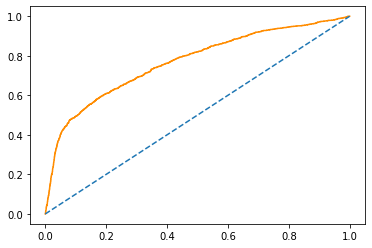

In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(Y_test, prob_default)

Here, if we have other models, we could compare ROC of all models to choose the optimal model.

#### Method 3: Confusion Matrices

<img src="https://assets.datacamp.com/production/repositories/4876/datasets/01ce16bcd7a7a76c1fa0cb6c0ef22647845419a5/3_9_conf_ex2.PNG" alt="drawing" width="500" height="300"/>


We look at **`Default recall`** (or sensitivity) is the proportion of true defaults predicted.\
Default recall: Recall(1)

Set different values for the threshold on probability of default, and we can see the changes in confusion matrix and how the changing values affect the model's performance. Normally, we are seeking for **Highest Default Recall**



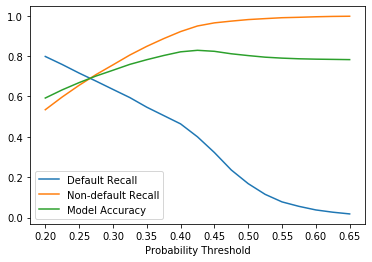

In [187]:
# Import function
from sklearn.metrics import precision_recall_fscore_support

# Define thresholds, default_recalls, and nondefault_recalls (get 19 numbers when thresh increases by 0.025)
thresh = [0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
def_recalls = [0.7981438515081206,
 0.7583139984532096,0.7157772621809745,0.6759474091260634,0.6349574632637278,0.594354215003867,0.5467904098994586,
 0.5054137664346481,0.46403712296983757,0.39984532095901004,0.32211910286156226,0.2354988399071926,0.16782675947409126,
 0.1148491879350348,0.07733952049497293, 0.05529775715390565, 0.03750966744006187, 0.026295436968290797, 0.017788089713843776]
nondef_recalls = [0.5342465753424658, 0.5973037616873234,0.6552511415525114, 0.708306153511633, 0.756468797564688,
 0.8052837573385518, 0.8482278756251359, 0.8864970645792564, 0.9215046749293324, 0.9492280930637095, 0.9646662317895195,
 0.9733637747336378, 0.9809741248097412, 0.9857577734290063, 0.9902152641878669,0.992280930637095, 0.9948901935203305,
 0.9966297021091541, 0.997499456403566]
accs = [0.5921588594704684, 0.6326374745417516, 0.6685336048879837, 0.7012050237610319, 0.7298031228784793, 0.7589952477936185,
 0.7820773930753564, 0.8028682959945689, 0.8211133740665308, 0.8286659877800407, 0.8236591989137814, 0.811439239646979,
 0.8025288526816021, 0.7946367956551256, 0.7898845892735913, 0.7866598778004074, 0.7847929395790902, 0.7836897488119484, 0.7825016972165648]
ticks = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]


# Plot how thresholds affect models
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()